# [Predicting Stock Prices with Python using Machine Learning - Linear Regression](https://www.youtube.com/watch?v=AXBhrLongC8)


This is an introductory tutorial by Algovibes

- Introduction
- Data prep
- Model building, fitting & prediction
- Strategy, Performance and Visualization
- Overfitting and avoiding with train test split
- Number of trades
- Playing around with different assets, lags (skippable)

This notebook is purely for self-study purposes. DO NOT use only this technique for any trading strategy.

## Model

*Dependent variable* = actual return on the day

*Independent variables* = prior n days returns (*i.e.* lagged returns)

Be wary of overfitting.

### Linear Regression

From [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html):

class sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)

numpy.cumsum(arr, axis=None, dtype=None, out=None) function is used when we want to compute the cumulative sum of array elements over a given axis


### Train Test Split

From [skelearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)[source]


# References

- [numpy](https://pypi.org/project/numpy/)

- [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

- [Train, Test & Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

- [The Ticker module](https://pypi.org/project/yfinance/)


In [15]:
# essential library packages
import numpy as np # fundamental package for array computing
from sklearn.linear_model import LinearRegression # 
from sklearn.model_selection import train_test_split
import yfinance as yf # market data from Yahoo! Finance's API

In [2]:
ticker = "^GSPC" # S&P 500
df = yf.download(ticker, start="2010-01-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
df["returns"] = np.log(df.Close.pct_change() + 1) # new column for percent change

In [4]:
# lags - the history
def lagit(df, lags):
    names = []
    for i in range(1, lags + 1):
        l = "Lag_" + str(i)
        df[l] = df["returns"].shift(i)
        names.append(l)
    return names

In [5]:
lagnames = lagit(df, 5)
df.dropna(inplace=True) # remove NaN values

In [9]:
# Model building, fitting and prediction
model = LinearRegression() # instantiate model object
model.fit(df[lagnames], df["returns"]) # fit model
df["prediction_LR"] = model.predict(df[lagnames])

<AxesSubplot:xlabel='Date'>

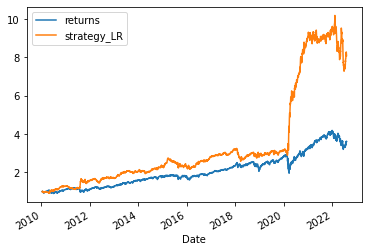

In [13]:
# Strategy, Performance and Visualization
df["direction_LR"] = [1 if i > 0 else -1 for i in df.prediction_LR] # =1 buy, -1 sell
df["strategy_LR"] = df["direction_LR"] * df["returns"]
np.exp(df[["returns", "strategy_LR"]].sum())
np.exp(df[["returns", "strategy_LR"]].cumsum()).plot()

<AxesSubplot:xlabel='Date'>

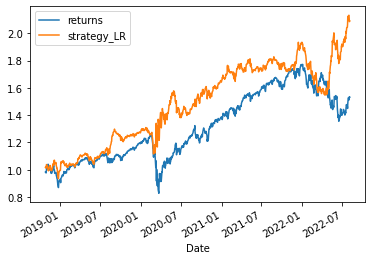

In [20]:
# split data into train and test datasets to avoid overfitting
train, test = train_test_split(df, shuffle=False, test_size=0.3, random_state=0)
train = train.copy()
test = test.copy()
model = LinearRegression()
model.fit(train[lagnames], train["returns"])
test["prediction_LR"] = model.predict(test[lagnames])
test["direction_LR"] = [1 if i > 0 else -1 for i in test.prediction_LR] # =1 buy, -1 sell
test["strategy_LR"] = test["direction_LR"] * test["returns"]
np.exp(test[["returns", "strategy_LR"]].sum())
np.exp(test[["returns", "strategy_LR"]].cumsum()).plot()

In [22]:
(test["direction_LR"].diff() != 0).value_counts()

False    491
True     459
Name: direction_LR, dtype: int64